# Introduction to RDKit

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

## Reading molecules

### Valid molecules are objects

In [2]:
mol = Chem.MolFromMolFile('mol.sdf')

In [3]:
mol

### Invalid molecules are None

In [4]:
test_mol = Chem.MolFromMolFile('invalid_mol.sdf')

[11:48:17] Atom line too short: '  1  2  1  0' on line 10


In [5]:
test_mol

In [6]:
test_mol == None, mol == None

(True, False)

# Attributes

In [7]:
mol.GetNumAtoms()

9

In [8]:
atoms = [atom for atom in mol.GetAtoms()]

atoms

In [9]:
atom = atoms[0]

print(f'Idx: {atom.GetIdx()}')
print(f'Z: {atom.GetAtomicNum()}')
print(f'Q: {atom.GetFormalCharge()}')
print(f'M: {atom.GetMass()}')
print(f'Number of bonds: {atom.GetDegree()} ')

Idx: 0
Z: 6
Q: 0
M: 12.011
Number of bonds: 1 


In [10]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.InstallIPythonRenderer()

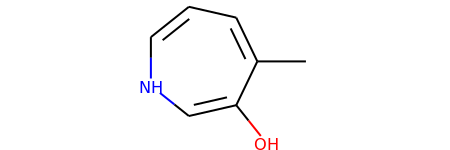

In [11]:
mol

In [12]:


def add_atom_index(molecule):
    
    m = Chem.Mol(molecule) # create a copy
    
    n_atoms = m.GetNumAtoms()
    for atom in m.GetAtoms():
        atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
    return m

In [13]:
mm = add_atom_index(mol)

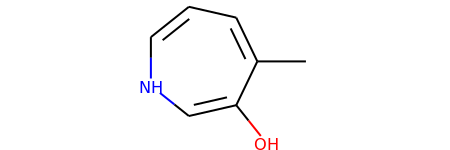

In [14]:
mol

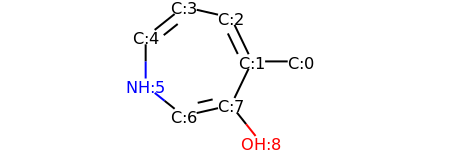

In [15]:
mm

# SMILES

In [16]:
Chem.MolToSmiles(mol)

'CC1=CC=CNC=C1O'

### For example, which molecules do these SMILES represent?

In [17]:
smiles_1 = 'C1CCCCC1'

smiles_2 = 'O1CCOCC1'

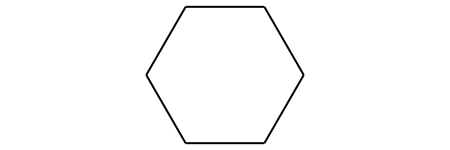

In [18]:
Chem.MolFromSmiles(smiles_1)

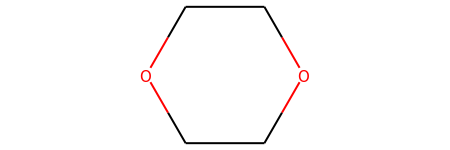

In [19]:
Chem.MolFromSmiles(smiles_2)

### And this one?

In [20]:
smiles_3 = 'C1CCCC2CCCCC12'

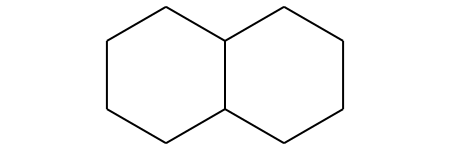

In [21]:
Chem.MolFromSmiles(smiles_3)

### Aromatic bonds can be included with lower case letters

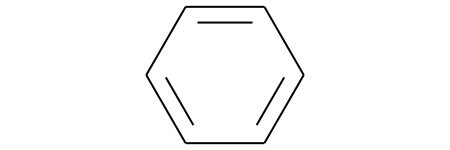

In [22]:
Chem.MolFromSmiles('c1ccccc1')

### Steroechemistry

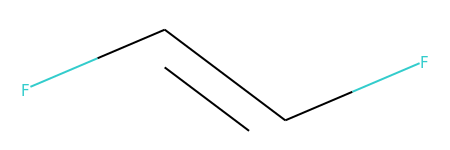

In [23]:
Chem.MolFromSmiles('F/C=C/F')

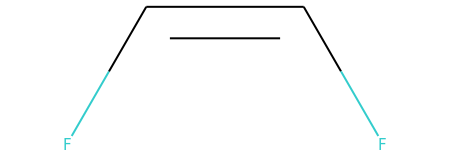

In [24]:
Chem.MolFromSmiles('F/C=C\F')

### Non-bonded compunds

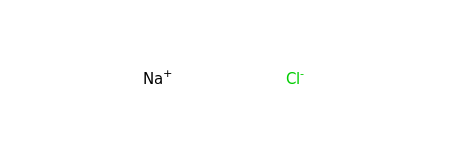

In [25]:
Chem.MolFromSmiles('[Na+].[Cl-]')

# Fingerprints

In [26]:
IPythonConsole.UninstallIPythonRenderer()

In [27]:
mol

### Morgan fingerprints

In [28]:
morgan_fps = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=1024)

In [29]:
morgan_fps.ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000100000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000010000000000000000000000000001000000000000000000100000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000100000000000000000000110000000000000000000000000000000000000000100000000000100000000100000000000000000000000000000000000001000100000000000010000000000000000000000000000000000000100000000001000001000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [30]:
list(morgan_fps)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
import numpy as np

In [32]:
np.array(morgan_fps)

array([0, 0, 0, ..., 0, 0, 0])

# A partir de los FPs, se puede cuantificar qué tan parecidas son dos moléculas.

In [33]:
IPythonConsole.InstallIPythonRenderer()

mol1 = Chem.MolFromSmiles('c1ccccn1')
mol2 = Chem.MolFromSmiles('c1ccco1')

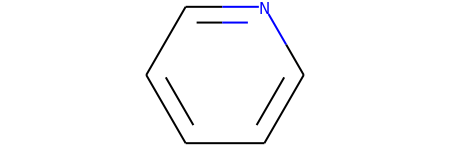

In [34]:
mol1

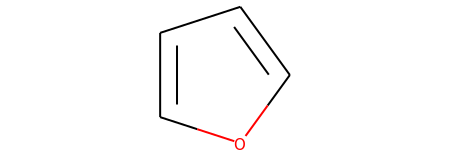

In [35]:
mol2

In [36]:
IPythonConsole.UninstallIPythonRenderer()

bit1 = {}
bit2 = {}

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1,radius=3, nBits=2048, bitInfo=bit1)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius=3, nBits=2048, bitInfo=bit2)

In [37]:
bit1

{378: ((5, 0),),
 383: ((5, 2),),
 389: ((2, 2),),
 437: ((0, 2), (4, 2)),
 1018: ((5, 3),),
 1088: ((1, 1), (2, 1), (3, 1)),
 1155: ((3, 2), (1, 2)),
 1603: ((5, 1),),
 1866: ((4, 1), (0, 1)),
 1873: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0))}

In [38]:
bit2

{183: ((0, 3),),
 218: ((2, 2), (1, 2)),
 656: ((4, 0),),
 787: ((3, 1), (0, 1)),
 1088: ((1, 1), (2, 1)),
 1383: ((4, 2),),
 1872: ((0, 2), (3, 2)),
 1873: ((0, 0), (1, 0), (2, 0), (3, 0)),
 1959: ((4, 1),)}

# Tanimoto

!['AB'](sets_AB.png)

$$\Large
  T(A,B) = \frac{|A \cap B|}{|A \cup B|}
$$

obs:
$$\Large
  0 \leq T(A,B) \leq 1
$$

### Para el caso de los fingerprints, dadas dos moléculas $M_A$ y $M_B$, el conjunto A representa los bits distintos de cero de la molécula A, y el conjunto B representa los bits distintos de cero de la molécula B.

In [39]:
def tanimoto(fpA,fpB):
    
    num = np.dot(fpA,fpB)
    den = np.sum(fpA)+ np.sum(fpB) - num
    
    tanimoto_index = num/den
    
    return tanimoto_index

In [40]:
tanimoto(fp1,fp1), tanimoto(fp2,fp2)

(1.0, 1.0)

In [41]:
tanimoto(fp1,fp2)

0.11764705882352941

In [42]:
from rdkit import DataStructs

In [43]:
DataStructs.TanimotoSimilarity(fp1,fp2)

0.11764705882352941

In [44]:
%%timeit
tanimoto(fp1,fp2)

3.62 ms ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%%timeit
DataStructs.TanimotoSimilarity(fp1,fp2)

996 ns ± 6.43 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [46]:
bit1

{378: ((5, 0),),
 383: ((5, 2),),
 389: ((2, 2),),
 437: ((0, 2), (4, 2)),
 1018: ((5, 3),),
 1088: ((1, 1), (2, 1), (3, 1)),
 1155: ((3, 2), (1, 2)),
 1603: ((5, 1),),
 1866: ((4, 1), (0, 1)),
 1873: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0))}

In [47]:
IPythonConsole.InstallIPythonRenderer()

The default highlight colors for the Morgan bits indicate:

        blue: the central atom in the environment

        yellow: aromatic atoms

        gray: aliphatic ring atoms

The default highlight colors for the RDKit bits indicate:

        yellow: aromatic atoms

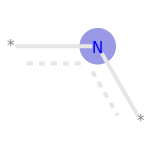

In [48]:
Chem.Draw.DrawMorganBit(mol1,378, bit1)

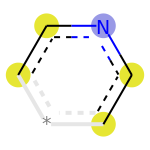

In [49]:
Chem.Draw.DrawMorganBit(mol1,383, bit1)

In [50]:
# all at once

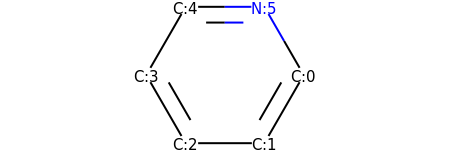

In [51]:
add_atom_index(mol1)

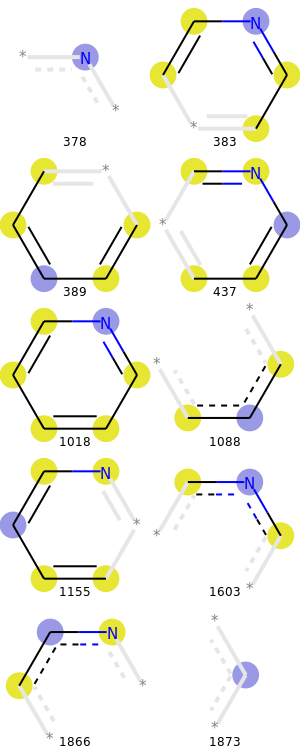

In [52]:
tpls = [(mol1,bit,bit1) for bit in fp1.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=2,legends=[str(x) for x in fp1.GetOnBits()])

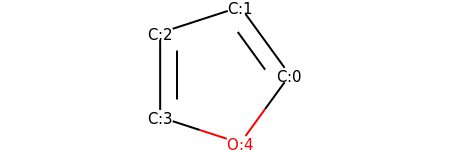

In [53]:
add_atom_index(mol2)

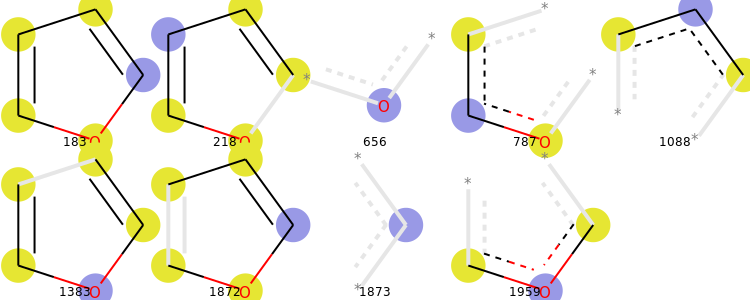

In [54]:
tpls = [(mol2,bit,bit2) for bit in fp2.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=5,legends=[str(x) for x in fp2.GetOnBits()])